## Exo 16

#### Discriminant linéaire par algorithme Perceptron.

Pour rappel, dans le cadre du perceptron, on optimise le critère suivant : $$ J_P(\bf{w})=-\Sigma_{\bf{X}_i mal classes} \bf{w}^T\bf{X}_i.t_i $$

Un point $X_i$ est mal classé si $sign(\bf{w}^T\bf{X}_i)\neq t_i $, ou autrement dit $\bf{t_iw^TX_i < 0}$. L'incrément est donné par $\delta\bf{X}_i t_i $. *NB : on travaille ici avec des données "augmentées" mais non "normalisées" (i.e. NON pré-multipliées par leurs étiquettes de classe). La normalisation est gérée explicitement, par multiplication par $t_i$*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.io import loadmat

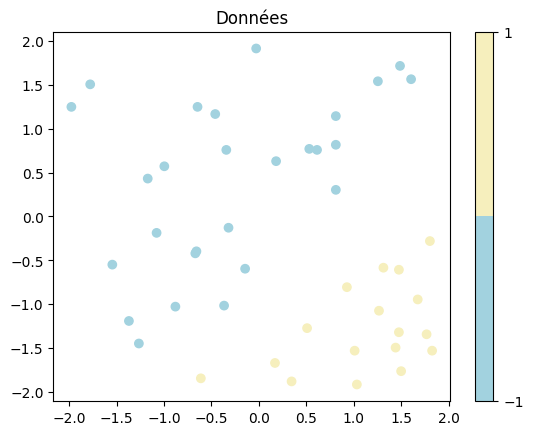

In [2]:
data = loadmat('Test1.mat')
t, x1, x2 = data['t'], data['x1'], data['x2']

custom_cmap = ListedColormap(['#A2D2DF', '#F6EFBD'])

plt.figure()
plt.scatter(x1, x2, c=t, cmap=custom_cmap), plt.title('Données'), plt.colorbar(ticks=[-1,1])
plt.show()

Les données sont linéairement séparables. On va estimer la droite de séparation par algorithme du Perceptron.

In [ ]:
# Matrice augmentée
X = np.column_stack((x1, x2, np.ones((t.shape))))  # Ajouter le biais (colonne de 1)
N, d = X.shape

# Initialisation
w = np.zeros(d)  # Poids initialisés à zéro
epoch = 0
delta = 1  # Pas d'apprentissage

# Préparer le graphique
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=t, cmap=custom_cmap)
plt.title("Évolution des droites de séparation")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(alpha=0.3)

# Boucle sur les epochs
while epoch < 50:
    mal_classe = 0
    for i in range(N):
        if np.sign(t[i] * w.T @ X[i, :]) <= 0:
            mal_classe += 1
            w = w + delta * t[i] * X[i, :].T  # Mise à jour des poids
    
    # Calcul des points pour tracer la droite de séparation
    x1_range = np.linspace(x1.min(), x1.max(), 100)
    x2_range = -(w[0] * x1_range + w[2]) / w[1]
    
    # Affichage de la droite à chaque epoch
    if epoch % 5 == 0:  # Affiche une droite tous les 5 epochs pour éviter trop de tracés
        plt.plot(x1_range, x2_range, label=f"Epoch {epoch}")
    
    epoch += 1

# Finaliser le graphique
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\kille\AppData\Local\Temp\ipykernel_11204\2197743793.py:28: RuntimeWarning: invalid value encountered in divide
  x2_range = -(w[0] * x1_range + w[2]) / w[1]


L'animation ne serre pas à grand chose, étant donné qu'on a une convergence en 2epochs.